<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/MACHINE%20LEARNING%20Y%20DEEP%20LEARNING/Churn_EmpresaTelco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis Churn con Machine Learning**

Las empresas de telecomunicaciones aplican modelos de aprendizaje automático para predecir la rotación de clientes y toman medidas como descuentos, ofertas especiales u otras gratificaciones para mantener a sus clientes.

Un análisis de rotación de clientes (churn) es un problema de **clasificación** típico dentro del dominio del **aprendizaje supervisado**.

basado en:

https://gist.github.com/felixfrohboese/38f63227c449714e673cd11ea5ac3613#file-telco_customer_churn_analysis-ipynb

En este ejemplo, se crea un pipeline básico de aprendizaje automático basado en un conjunto de datos de Kaggle y se compara el rendimiento de diferentes tipos de modelos. El pipeline consta de 8 pasos:

- Paso 1: Definición del problema
- Paso 2: Recopilación de datos
- Paso 3: Análisis de datos exploratorios (EDA)
- Paso 4: Ingeniería de características
- Paso 5: división de entrenamiento/prueba
- Paso 6: Definición de métricas de evaluación del modelo
- Paso 7: Selección, entrenamiento, predicción y evaluación del modelo
- Paso 8: Ajuste de hiperparámetros/Mejora del modelo

##**Paso 1: Definición del Problema**

El desafío clave es predecir si un cliente individual abandonará o no la empresa de telecomunicaciones. Para lograrlo, los modelos de aprendizaje automático se entrenan en función del 80 % de los datos de muestra. El 20% restante se utiliza para aplicar los modelos entrenados y evaluar su poder predictivo con respecto a "churn/not churn".

Una pregunta secundaria será qué características realmente impulsan la rotación de clientes. Esa información se puede utilizar para identificar los "dolores" de los clientes y resolverlos efectuando alguna acción para que los clientes se queden.

Para comparar modelos y seleccionar el mejor para esta tarea, se mide la exactitud (*accuracy*).

##**Paso 2: Recopilación de Datos**


El conjunto de datos para este problema de clasificación se toma de Kaggle y proviene de la colección de conjuntos de datos de muestra de IBM (https://www.kaggle.com/blastchar/telco-customer-churn).

El pipeline inicia con la importación de algunas bibliotecas básicas que se necesitan. Esto incluye Pandas y Numpy para el manejo y procesamiento de datos, así como Matplotlib y Seaborn para visualización.

Para este ejercicio, el conjunto de datos (formato .csv) se descarga, se lee en Jupyter y se almacena en un Pandas DataFrame.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline



Acceso Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta = "/content/drive/MyDrive/Colab Notebooks/MaestriaCienciaDatosV1/MachineLearningAplicado/SesionI"
#ruta = "/content/drive/My Drive/Colab Notebooks"

In [ ]:
df = pd.read_csv(ruta+'/WA_Fn-UseC_-Telco-Customer-Churn.csv')

##**Paso 3: Análisis de datos exploratorio**

Después de la recopilación de datos, se llevan a cabo varios pasos para explorar los datos. El objetivo de este paso es obtener una comprensión de la estructura de datos, realizar el preprocesamiento inicial, limpiar los datos, identificar patrones e inconsistencias en los datos (es decir, asimetría, valores atípicos, valores faltantes), construir y validar hipótesis.

**Comprensión**

En la primera parte de EDA, se evalúa la estructura de datos, las columnas incluidas y los tipos de datos. Los objetivos de este paso son obtener una comprensión general del conjunto de datos y verificar el conocimiento del dominio. En este paso se utilizan algunas funciones estándar de Pandas:

In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Obtenga un resumen del Dataframe incl. tipos de datos, forma y almacenamiento de memoria.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Obtenga información estadística sobre características numéricas.

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Los valores únicos de cada característica se imprimen para obtener una comprensión más profunda.

In [ ]:
for i in df.columns:
    print(f"Unique {i}'s count: {df[i].nunique()}")
    print(f"{df[i].unique()}\n")

Unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count: 2
['Female' 'Male']

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
['Yes' 'No']

Unique Dependents's count: 2
['No' 'Yes']

Unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count: 2
['No' 'Yes']

Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']

Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']

Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']

Unique StreamingTV's

###**Significado de Características**

Al inspeccionar las columnas y sus valores únicos, se puede generar una comprensión general de las características:

**Etiquetas de clasificación**

 - Churn: si el cliente abandonó o no (Sí o No)

**Servicios reservados al cliente**

- PhoneService: si el cliente tiene un servicio telefónico o no (Sí, No)
- MultipleLines: si el cliente tiene múltiples líneas o no (Sí, No, Sin servicio telefónico)
- InternetService: proveedor de servicios de Internet del cliente (DSL, fibra óptica, No)
- OnlineSecurity: si el cliente tiene seguridad en línea o no (Sí, No, Sin servicio de Internet)
- OnlineBackup: si el cliente tiene una copia de seguridad en línea o no (Sí, No, Sin servicio de Internet)
- DeviceProtection: si el cliente tiene protección de dispositivo o no (Sí, No, Sin servicio de Internet)
- TechSupport: si el cliente tiene soporte técnico o no (Sí, No, Sin servicio de Internet)
- StreamingTV: si el cliente tiene transmisión de TV o no (Sí, No, Sin servicio de Internet)
- StreamingMovies: si el cliente tiene películas en streaming o no (Sí, No, Sin servicio de Internet)

**Información de la cuenta del cliente**

- Tenure - Número de meses que el cliente ha permanecido en la empresa
- Contract: el plazo del contrato del cliente (mes a mes, un año, dos años)
- PaperlessBilling: si el cliente tiene facturación sin papel o no (Sí, No)
- PaymentMethod: el método de pago del cliente (cheque electrónico, cheque enviado por correo, transferencia bancaria (automática),
tarjeta de crédito (automática))
- MonthlyCharges: la cantidad cargada al cliente mensualmente
- TotalCharges: el monto total cobrado al cliente



**Información demográfica de los clientes**

- IDcliente - ID del cliente
- Gender: si el cliente es hombre o mujer
- SeniorCitizen: si el cliente es una persona mayor o no (1, 0)
- Partner: si el cliente tiene pareja o no (Sí, No)
- Dependents: si el cliente tiene dependientes o no (Sí, No)

###**Preprocesamiento de Datos para EDA**

In [ ]:
# Cambio de tipo de datos  "TotalCharges" y "tenure" a float.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

def feature_to_float(feature_list, df):
    for i in feature_list:
        df[i] = df[i].astype(float)
    return df

feature_to_float(['tenure'], df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# Renombrar los valores de "PaymentMethod" para mejor legibilidad.
payment_column = {'Electronic check': 'E-Check' , 'Mailed check': 'Mailed Check', 'Bank transfer (automatic)': 'Bank Transfer', 'Credit card (automatic)': 'Credit Card'}
df["PaymentMethod"].replace(payment_column, inplace=True)

In [ ]:
# Verificar tipos de datos para encontrar anomalias.
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
# Contar el número de valores faltantes
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

El análisis muestra 11 valores faltantes para "TotalCharges". Las entradas de datos respectivas (= filas) se eliminarán por simplicidad.

###**Construcción de hipótesis**

Al observar las características incluidas en los datos y conectarlas con su influencia potencial en la rotación de clientes, se pueden hacer las siguientes hipótesis:

- Cuanto más larga sea la duración del contrato, menos probable es que el cliente abandone, ya que se enfrenta con menos frecuencia a la decisión de rescisión/prórroga y, potencialmente, valora los contratos con menos esfuerzo.

- Los clientes están dispuestos a cancelar contratos simples con pocos componentes de productos asociados más rápido y con mayor frecuencia que los paquetes de productos más complejos; para los paquetes, los clientes valoran la menor complejidad administrativa. También pueden dudar en cancelar un contrato, cuando dependen de los componentes de servicio adicionales (por ejemplo, paquetes de seguridad).

- Los clientes con cónyuges e hijos podrían ser menos proclives a abandonar para mantener los servicios funcionando para su familia.

- Se supone que tenure, los términos de duración del contrato y la cantidad de servicios adicionales se encuentran entre los impulsores más importantes de la rotación.

- Los contratos más caros conducen a una mayor rotación, ya que las posibilidades de ahorrar dinero al cambiar de proveedor pueden ser mayores.

- Las personas mayores tienden a abandonar menos debido al esfuerzo prolongado asociado con la rescisión de contratos.

###**Exploración de Datos**

In [ ]:
# Aplica el estilo Fivethirtyeight a todos los gráficos
plt.style.use("fivethirtyeight")

<ipython-input-14-c28c9dd6f5c0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Churn'], palette="Blues", linewidth=1)


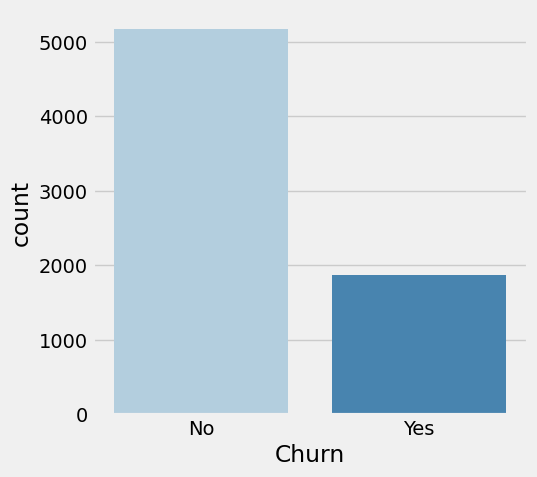

In [ ]:
# Muestra una distribución de frecuencia para churn.
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=df['Churn'], palette="Blues", linewidth=1)
plt.show()

El gráfico muestra un desequilibrio de clase de los datos entre los que se dan de baja y los que no. Para abordar esto, el remuestreo sería un enfoque adecuado. Para simplificar este caso, el desequilibrio se mantiene adelante y se eligen métricas específicas para las evaluaciones del modelo.

In [ ]:
# crea una función para generar boxplots.
plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}

def boxplot(x, y, df):

    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))

    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=df[[x, j]], palette="Blues", linewidth=1)
        ax.set_title(j)

    return plt.show()


<ipython-input-15-20aaee35cbd6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=x, y=j, data=df[[x, j]], palette="Blues", linewidth=1)
<ipython-input-15-20aaee35cbd6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=x, y=j, data=df[[x, j]], palette="Blues", linewidth=1)
<ipython-input-15-20aaee35cbd6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=x, y=j, data=df[[x, j]], palette="Blues", linewidth=1)


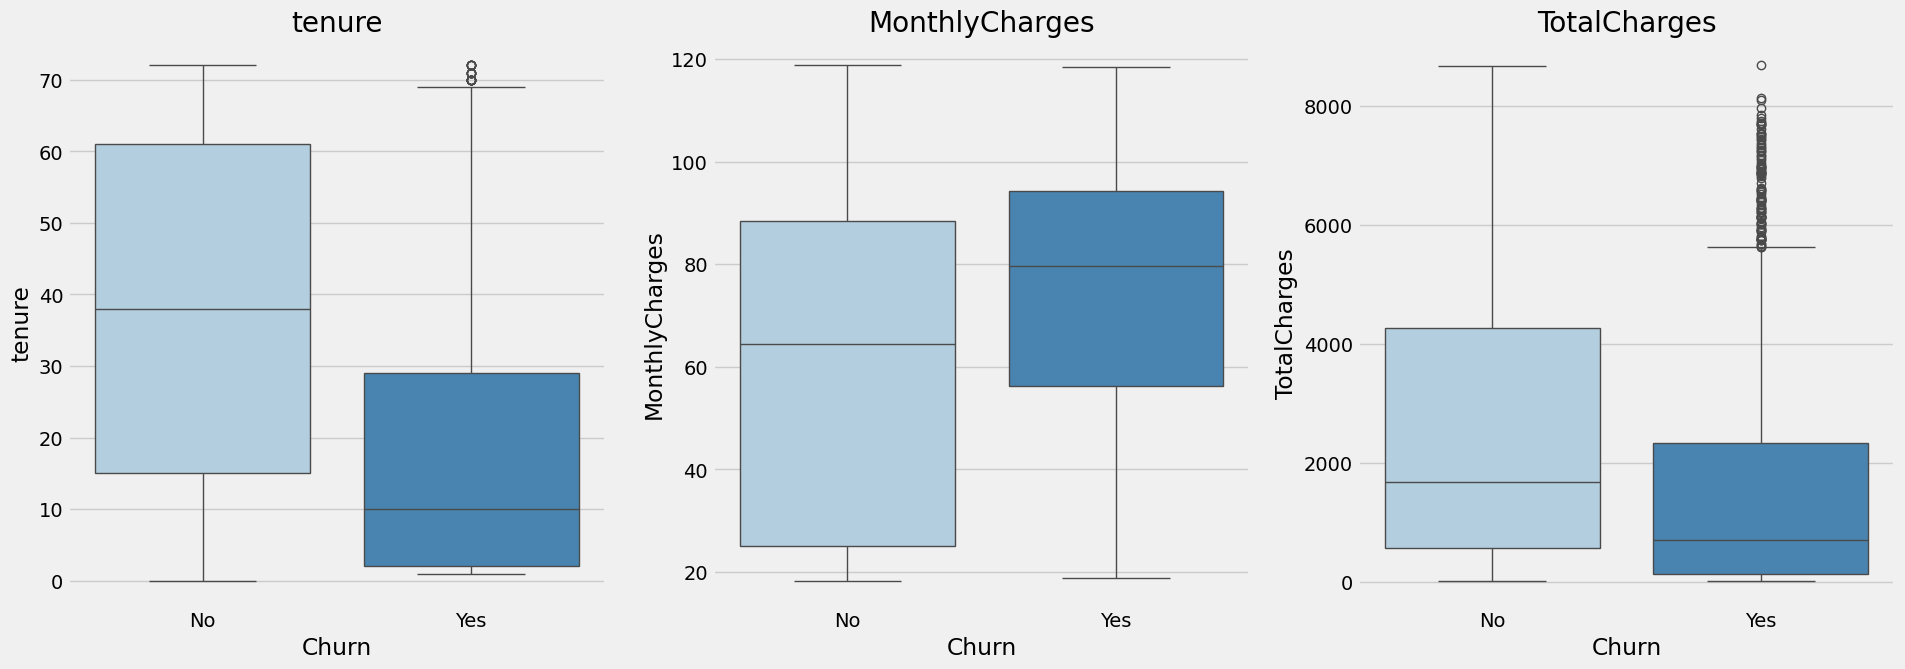

In [ ]:
# Genera boxplots para tenure, MonthlyCharges y TotalCharges.
boxplot("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], df)

- Los clientes que abandonan tienen una permanencia mucho más baja con una mediana de 10 meses en comparación con una mediana de no abandono de 38 meses
- Los clientes que abandonan tienen cargos mensuales más altos con una mediana de  80 USD y un rango intercuartílico mucho más bajo en comparación con el de los no desertores (mediana de aprox. 65 USD)

- Los cargos totales son el resultado de la permanencia y los cargos mensuales, que son más informativos de forma individual.

In [ ]:
# Crea una función para generar countplots:
def countplot(x, y, df):

    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])

    plt.figure(figsize=(7*columns, 7*rows))

    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)

    return plt.show()

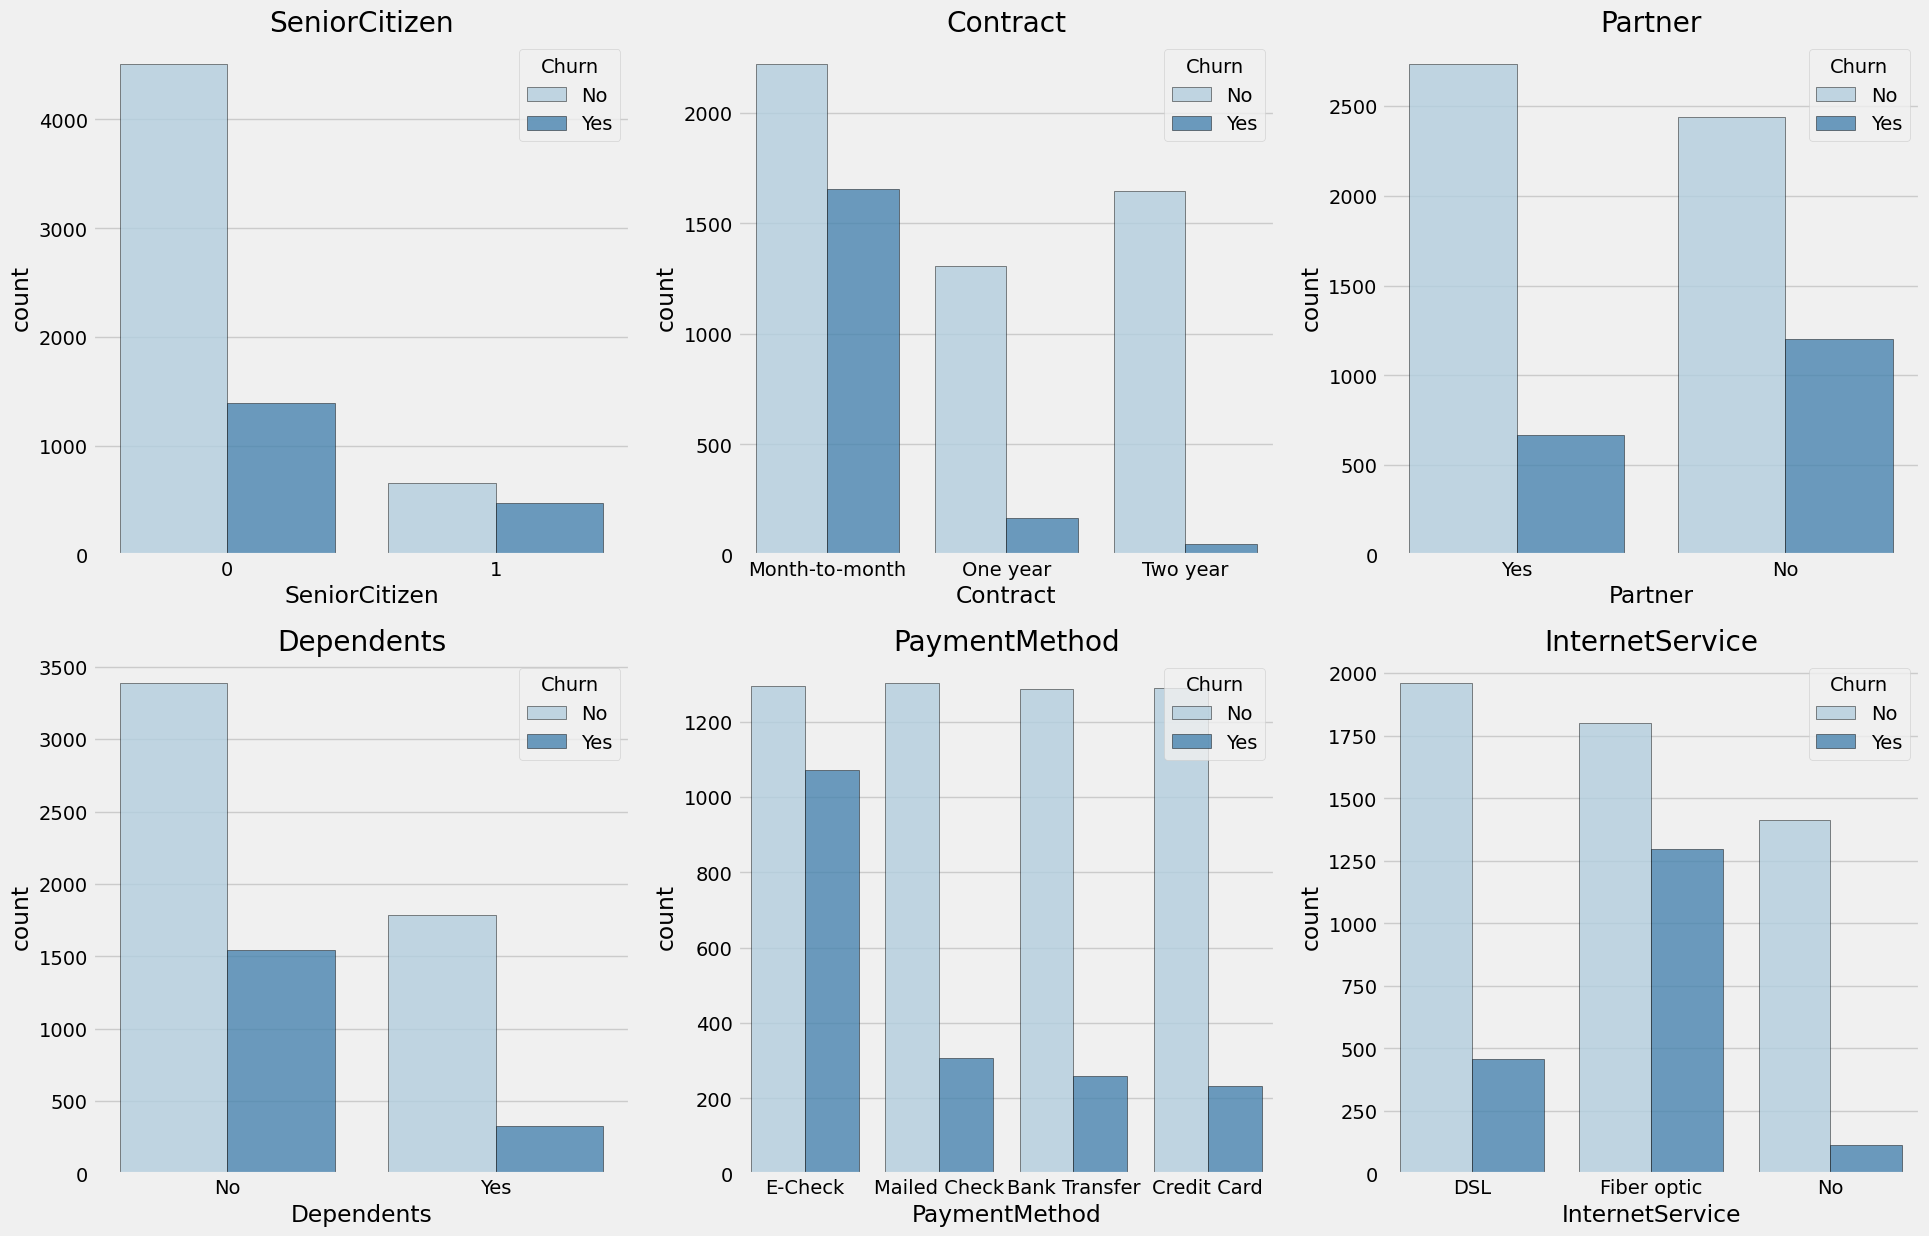

In [ ]:
# Genera countplots para varias características.
countplot("Churn", ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], df)


- La tasa de abandono de personas mayores es mucho más alta que la tasa de abandono de personas no mayores.
- Tasa de abandono para contratos de mes a mes mucho más alta que para otras duraciones de contrato.
- Tasa de abandono moderadamente más alta para clientes sin socios.
- Tasa de abandono mucho más alta para clientes sin parejas.
- El cheque electrónico de método de pago muestra una tasa de abandono mucho más alta que otros métodos de pago.
- Los clientes con fibra óptica de InternetService como parte de su contrato tienen una tasa de abandono mucho más alta.


###**Verifica Outliers en datos numéricos**

In [ ]:
# Verifica outliers aplicando el método IQR, se analiza si hay valores fuero de los límites IQR.
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df_num = df[numerical_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

No hay outliers en características numéricas detectadas con el método IQR  - no se realizaron ajustes.

###**Limpieza de Datos**

In [ ]:
# Elimina valores nulos.
df = df.dropna()

###**Acciones de ingeniería de características**

En función de los tipos de datos y los valores, se definen las siguientes acciones para preprocesar/diseñar las características para los algoritmos y el análisis posterior:

**Columnas eliminadas**

- ID de cliente: no relevante

**Sin acción**
- Ciudadano mayor

**Codificación de etiquetas** Las siguientes características son categóricas y tienen 2 valores (en su mayoría sí/no), por lo tanto, se transforman en números enteros binarios

- gender
- Partner
- Dependents
- Churn
- PhoneService
- PaperlessBilling

**Codificación One-Hot** Las siguientes características son categóricas, pero no ordinales (sin clasificación), tienen más de 2 valores. Para cada valor, se crea una nueva variable con un entero binario que indica si el valor ocurrió en una entrada de datos o no (1 o 0). 3 clases: 1 [ 1 0 0 ] 2 [ 0 1 0] 3 [0 0 1]

- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaymentMethod

**Escalado mín.-máx**. Los valores de las características numéricas se reescalan entre un rango de 0 y 1. El escalador mín.-máx. es el enfoque estándar para el escalado. Para las características distribuidas normalmente, se podría usar el escalador estándar, que escala los valores alrededor de una media de 0 y una desviación estándar de 1. Para simplificar, usamos el escalador mínimo-máximo para todas las características numéricas.

- tenure
- TotalCharges
- MonthlyCharges

##**Paso 4: Ingeniería de características**

En la ingeniería de características, se ejecutan los pasos identificados al final de EDA. Además, se generan nuevas características a partir de características existentes y se realiza un análisis de correlación después de que todas las características se hayan transformado en numéricas.

**Selección / generación de características**

In [ ]:
# Elimina customerID .
df = df.drop(columns='customerID')

In [ ]:
# Genera nueva característica "Number_AdditionalServices" al sumar el número de servicios adicionales consumidos.
df['Number_AdditionalServices'] = (df[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1)


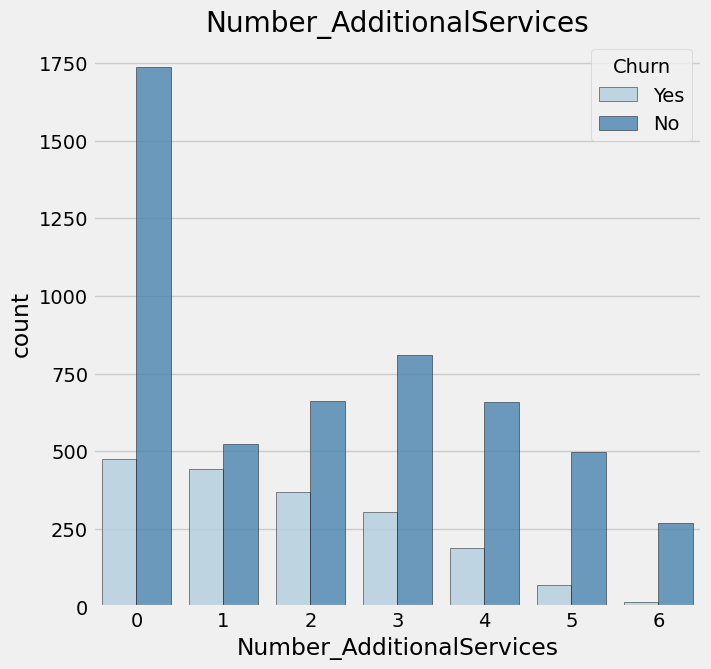

In [ ]:
# Genera countplot para la nueva característica.
countplot('Churn', ['Number_AdditionalServices'], df)

- El gráfico de recuento muestra una tasa de abandono muy alta para los clientes que tienen 1 servicio adicional.
- Los clientes con un número muy alto de servicios adicionales tienen una baja tasa de abandono.


**Label Encoding**

In [ ]:
# Label encoding para columnas identificadas (binarias).
features_le = ['gender', 'Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling']

def label_encoding(features, df):
    for i in features:
        df[i] = df[i].map({'Yes': 1, 'No': 0})
    return

label_encoding(['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling'], df)

df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

**One-Hot-Encoding**

In [ ]:
# One-Hot-Encoding de columnas identificadas (más de dos clases)
features_ohe = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Number_AdditionalServices']

df = pd.get_dummies(df, columns=features_ohe)

**Feature Rescaling: Min-Max-Scaling**

In [ ]:
# Min-Max-Scaling para columnas.
from sklearn.preprocessing import MinMaxScaler

features_mms = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_features_mms = pd.DataFrame(df, columns=features_mms)
df_remaining_features = df.drop(columns=features_mms)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df_features_mms)

df_rescaled_features = pd.DataFrame(rescaled_features, columns=features_mms, index=df_remaining_features.index)

df = pd.concat([df_remaining_features, df_rescaled_features], axis=1)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Number_AdditionalServices_0,Number_AdditionalServices_1,Number_AdditionalServices_2,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0.000000,0.115423,0.001275
1,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0.464789,0.385075,0.215867
2,0,0,0,0,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0.014085,0.354229,0.010310
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0.619718,0.239303,0.210241
4,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0.014085,0.521891,0.015330


**Correlation analysis**

<Axes: >

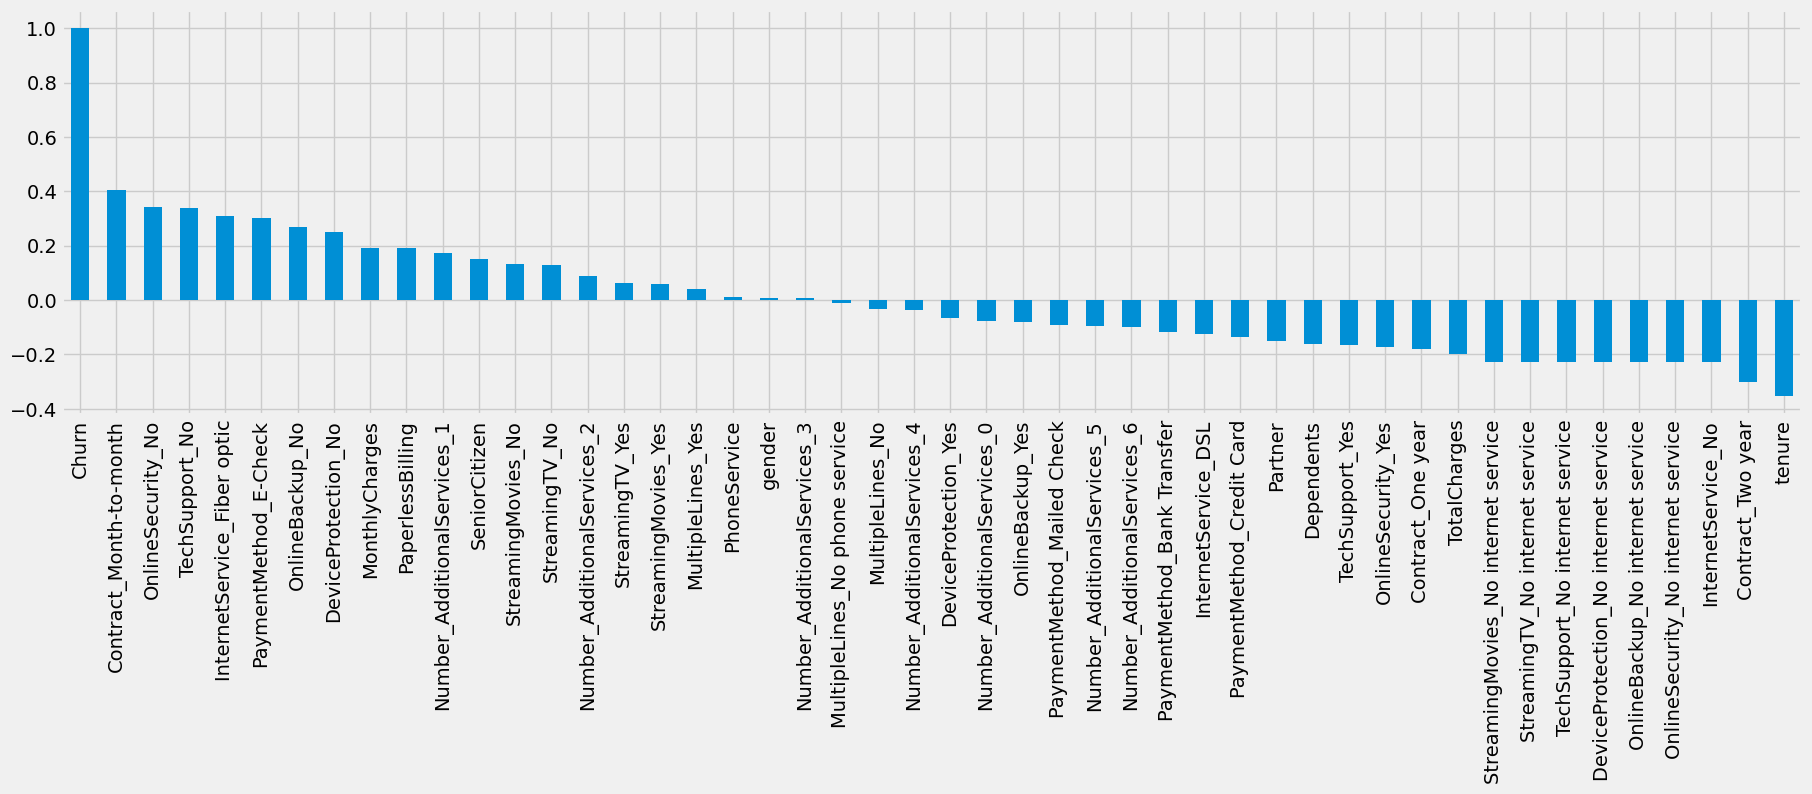

In [ ]:
# Muestra correlación de Churn con las características restantes.
plt.figure(figsize=(16,10))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

##**Paso 5: División Entrenamiento Prueba**

Para realizar los pasos de prueba y entrenamiento del modelo, el conjunto de datos se divide en un 80 % de datos de entrenamiento y un 20 % de datos de prueba. La columna "Churn" se define como la clase (la "y"), las columnas restantes como las características (la "X").

Como alternativa se podría definir un conjunto de entrenamiento y prueba estratificado: donde se preserven las proporciones de la clase churn (por ejemplo 70 % no abandono, 30 % abandono).

In [ ]:
from sklearn.model_selection import train_test_split

X1 = df.drop('Churn', axis=1)
X = X1.values
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Paso 6: Métricas de evaluación del modelo**

Para la evaluación del rendimiento de los modelos elegidos, se utilizan varias métricas:

- Feature weights: indica las principales características utilizadas por el modelo para generar las predicciones.
- Matriz de confusión: muestra una cuadrícula de predicciones verdaderas y falsas en comparación con los valores reales
- Accuracy: muestra la precisión general del modelo para el conjunto de entrenamiento y el conjunto de prueba
- Curva ROC: muestra la capacidad de diagnóstico de un modelo al reunir la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para diferentes umbrales de predicciones de clase (ejemplo, umbrales de 10%, 50% o 90% resultando una predicción de  churn)
- AUC (para ROC): mide la separabilidad general entre clases del modelo relacionado con la curva ROC
- Precision-Recall-Curve: muestra la capacidad de diagnóstico al comparar la tasa de falsos positivos (FPR) y la tasa de falsos negativos (FNR) para diferentes umbrales de predicciones de clase. Es adecuado para conjuntos de datos con desequilibrios de clase altos (valores negativos sobrerrepresentados), ya que se centra en la precision y recall, que no dependen del número de verdaderos negativos y, por lo tanto, excluye el desequilibrio.
-  F1 score: construye la media armónica de precision y recall y, por lo tanto, mide el compromiso entre ambos.
- AUC (para PRC): mide la separabilidad general entre las clases del modelo en relación con la curva de Precision-Recall

$$ precision = \frac{TP}{TP+FP}$$

$$ recall = \frac{TP}{TP+FN}$$

$$ F_1 = 2\times \frac{precision\times recall}{precision+recall}$$

- El F1 favorece clasificadores con precision y recall similares.
- En algunos casos es más importante precision, en otros recall
- Ejemplo, si se entrena un clasificador de videos seguros para niÑos, probablemente se preferirá clasificadores que rechazan buenos videos (bajo recall) pero se mantiene solo los seguros(alta precision).
- Por otro lado, si se entrena un algoritmo para detectar robos en imágenes de vigilancias: estaría bien si solo se tiene un 30% precision pero un 99% de recall de (pueden haber varios falsos altertas).

![](https://drive.google.com/uc?export=view&id=19ca3CDXWRwPbqJ91tboGYWtxJL8Eq92V)


- Figura muestra algunos dígitos. Si el umbral de decision esta en el medio (entre los dos 5): se encontrará 4 positivos y un falso positivo (el 6).

- Con ese umbral, la precision es 80% (4 de 5). Pero solo detecta 4 cincos de 6, recall de 67%  
- Si se aumenta el umbral, hasta la flecha, el falso positivo pasa a ser verdadero negativo la precision va a 100 %, pero el recall disminuye a 50%.
- Disminuir el umbral aumenta el recall.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score
#plot_confusion_matrix,

In [ ]:
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Función que muestra los feature weights por clasificador.
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)

    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")

    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")

    return print("")

In [ ]:
# Función que muestra la matriz de confusión para un clasificador y el accuracy en entrenamiento y prueba
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    #plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    #plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize='true', ax=ax)
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()

    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")

In [ ]:
# Función que muestra la curva ROC y su AUC
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):

    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()

    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

In [ ]:
# Muestra la curva precision-recall, el F1 score y AUC score
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):

    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()

    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)

    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')


##**Paso 7: Selección, entrenamiento, predicción y evaluación del modelo**


Al principio, probaremos varios modelos y mediremos su rendimiento con varias métricas. Esos modelos se optimizarán en un paso posterior ajustando sus hiperparámetros. Los modelos utilizados incluyen:

- K Vecinos más cercanos (K Nearest Neighbors): rápido, simple y basado en instancias
- Regresión logística - modelo rápido y lineal
- Random Forest: modelo de conjunto más lento pero preciso basado en árboles de decisión
- Support Vector Machines: modelo más lento pero preciso utilizado aquí en forma no lineal

**K Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instancia y entrenamiento de un clasificador KNN basado en el conjunto de entrenamiento.
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Hacer predicciones (clases y probabilidades) con el clasificador entrenado en el conjunto de prueba.
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

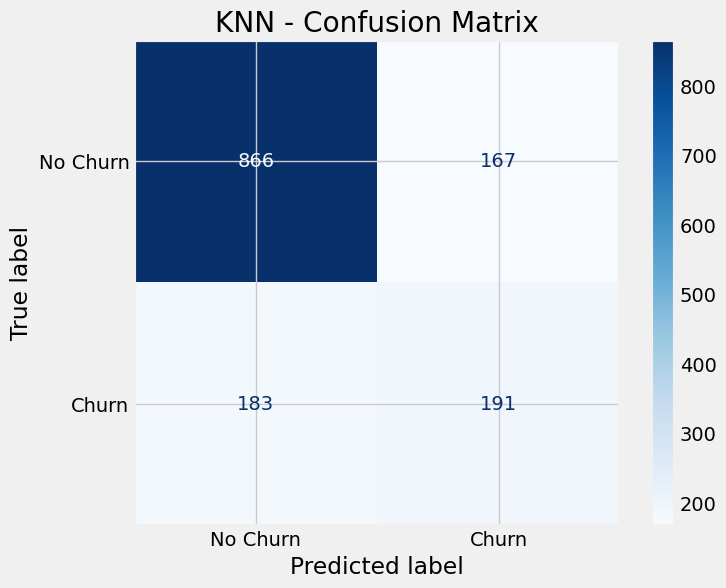

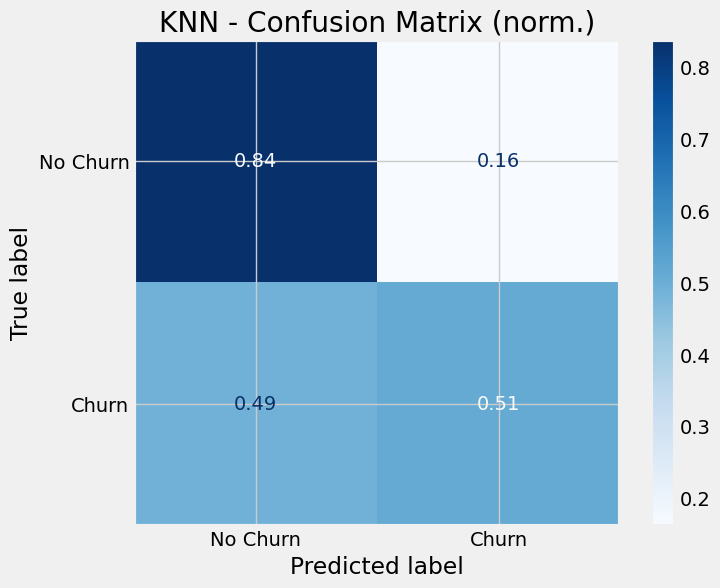

Accuracy Score Test: 0.7512437810945274
Accuracy Score Train: 0.8407111111111111 (as comparison)



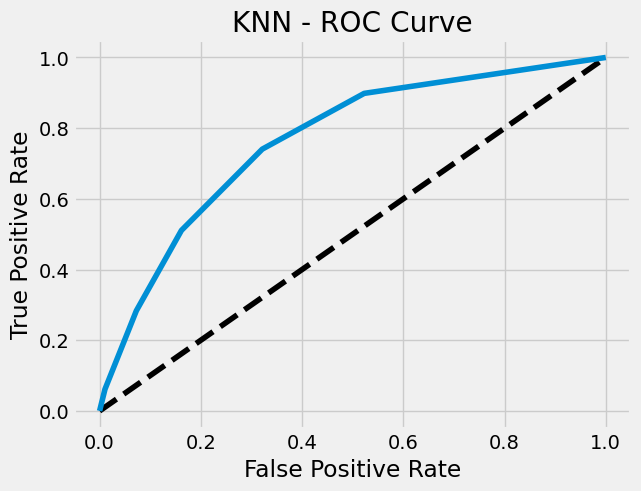

AUC Score (ROC): 0.7643318614077683



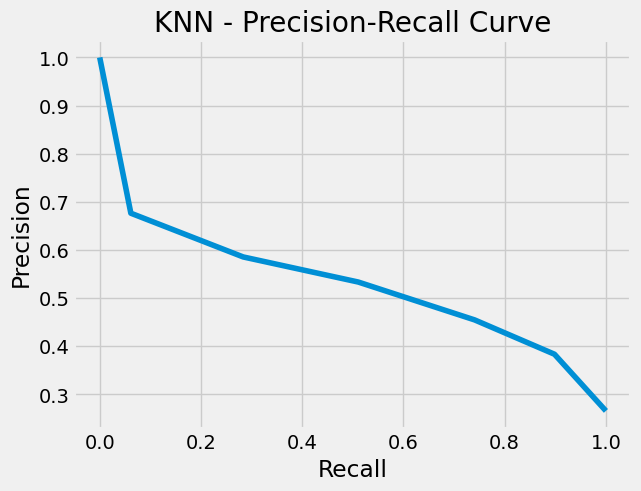

F1 Score: 0.5218579234972678 
AUC Score (PR): 0.5315284099143821



In [ ]:
# Visualizar evaluaciones del modelo.
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn, y_pred_knn, 'KNN')
roc_curve_auc_score(X_test, y_test, y_pred_knn_prob, 'KNN')
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn, y_pred_knn_prob, 'KNN')

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

#  Instancia y entrenamiento de un clasificador LogisticRegression basado en el conjunto de entrenamiento.

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Hacer predicciones (clases y probabilidades) con el clasificador entrenado en el conjunto de prueba.

y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

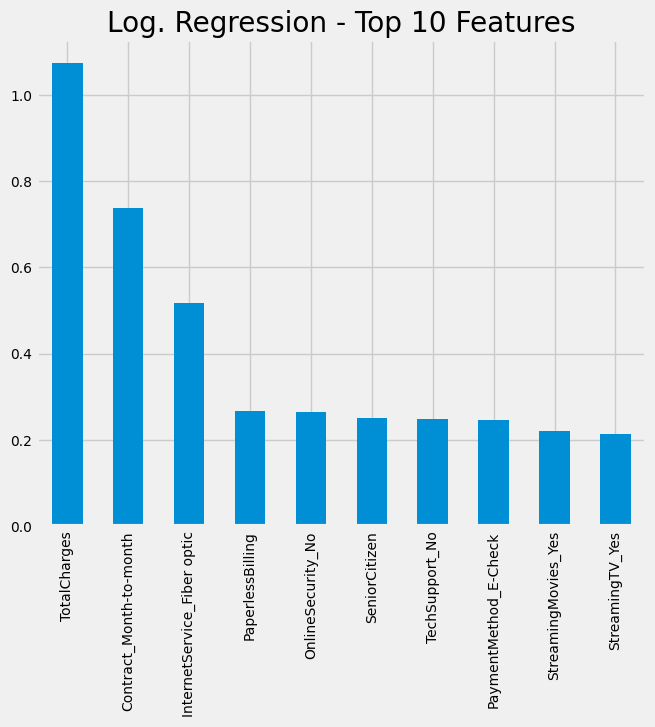

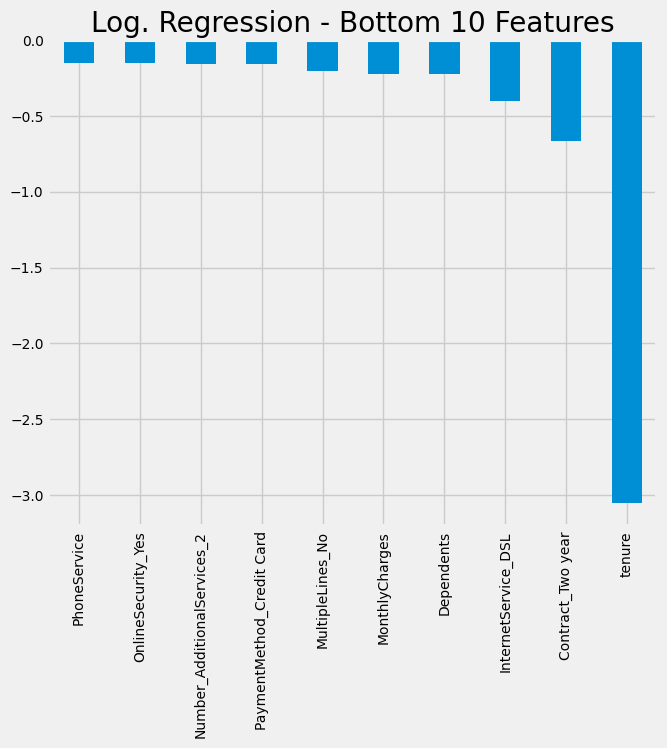

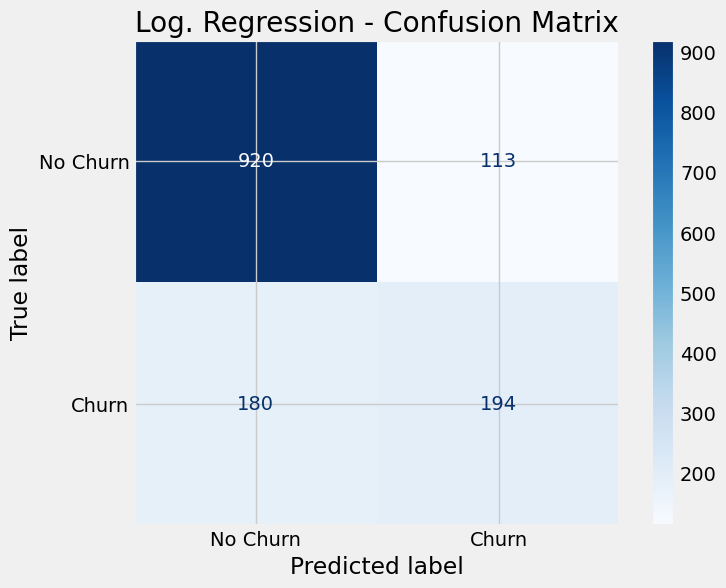

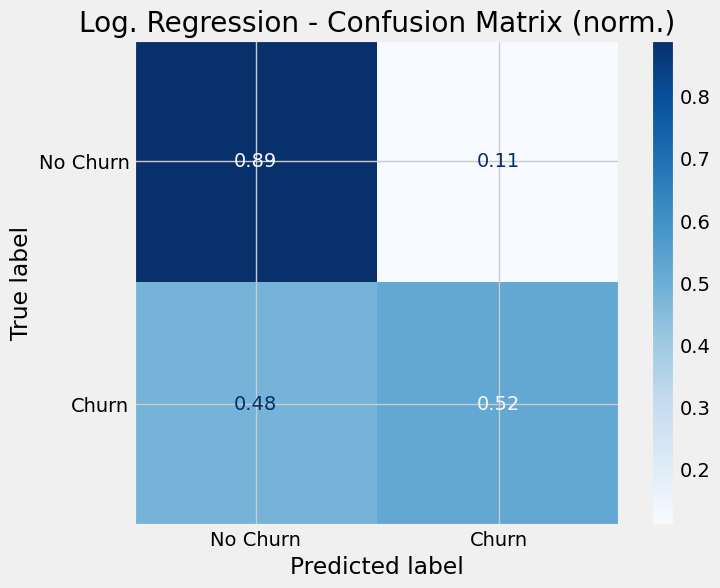

Accuracy Score Test: 0.7917555081734187
Accuracy Score Train: 0.8072888888888888 (as comparison)



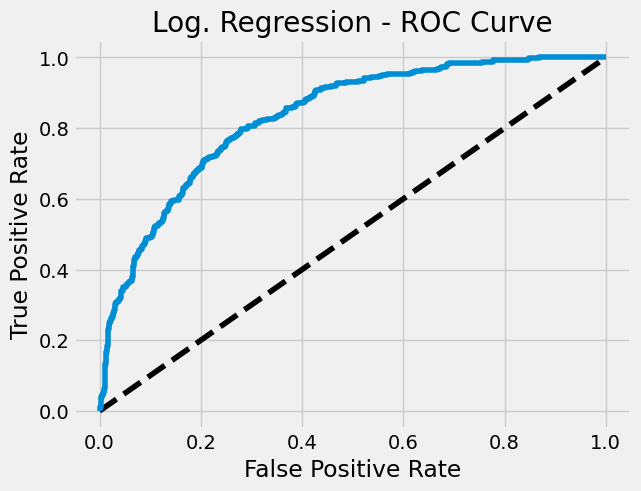

AUC Score (ROC): 0.8318458774867863



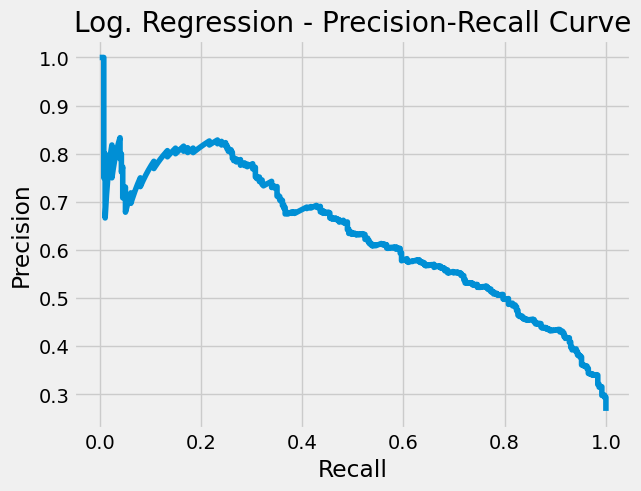

F1 Score: 0.5697503671071952 
AUC Score (PR): 0.6302838259105072



In [ ]:
# Visualizar evaluaciones del modelo.
feature_weights(X1, logreg, 'Log. Regression')
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, y_pred_logreg, 'Log. Regression')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, 'Log. Regression')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Log. Regression')

**Random Forest**

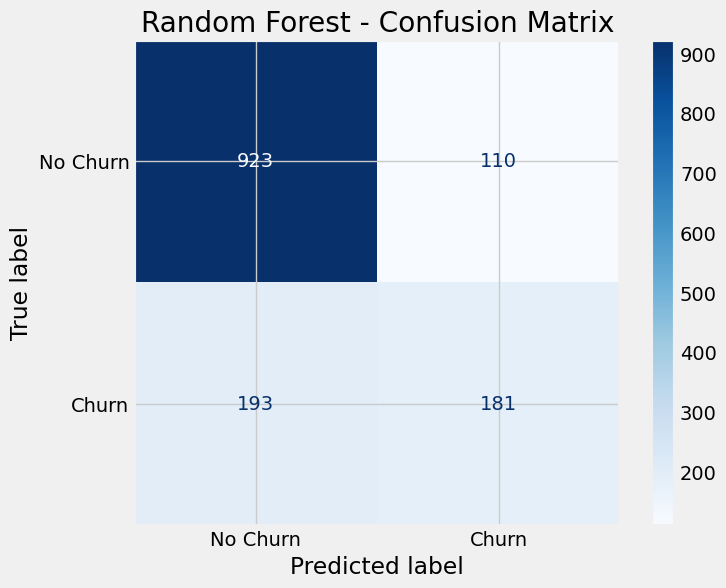

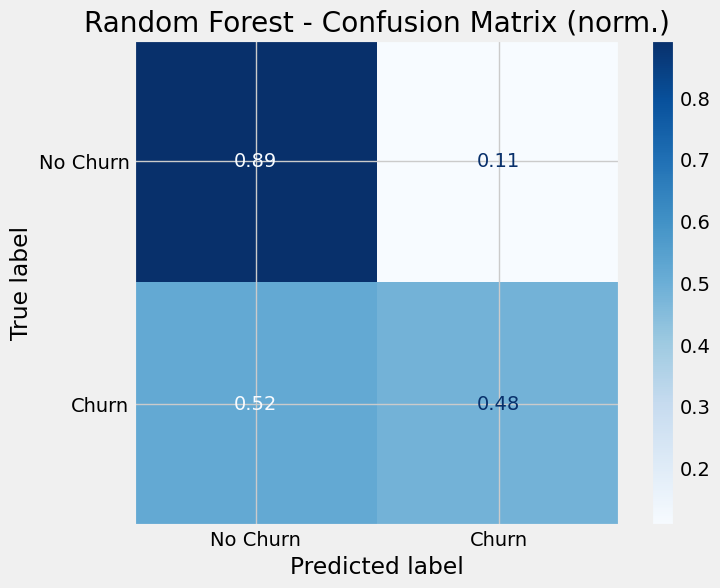

Accuracy Score Test: 0.7846481876332623
Accuracy Score Train: 0.9976888888888888 (as comparison)



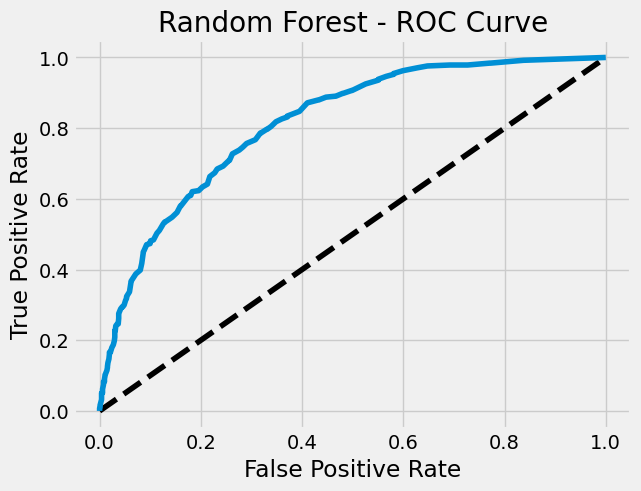

AUC Score (ROC): 0.8133790786401686



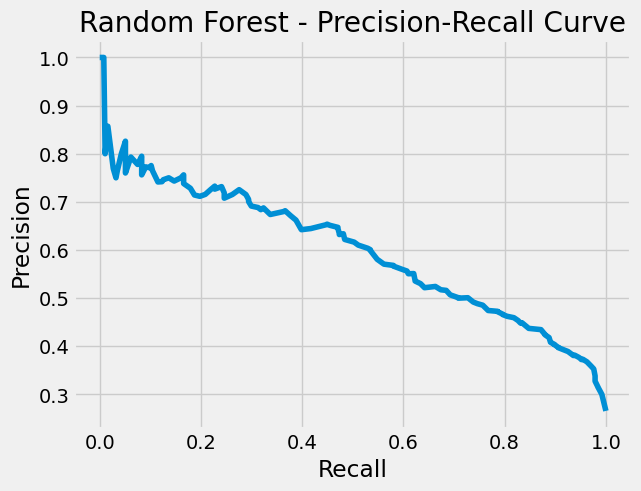

F1 Score: 0.544360902255639 
AUC Score (PR): 0.5984293507493831



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instancia y entrenamiento de un clasificador RandomForest basado en el conjunto de entrenamiento.
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Hacer predicciones (clases y probabilidades) con el clasificador entrenado en el conjunto de prueba.
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

# Visualizar evaluaciones del modelo.
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf, y_pred_rf, 'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf, y_pred_rf_prob, 'Random Forest')

**Support Vector Machine**

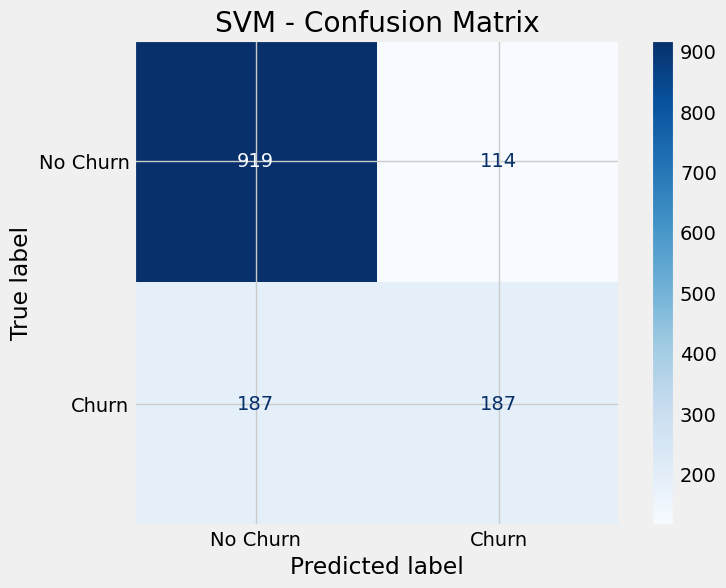

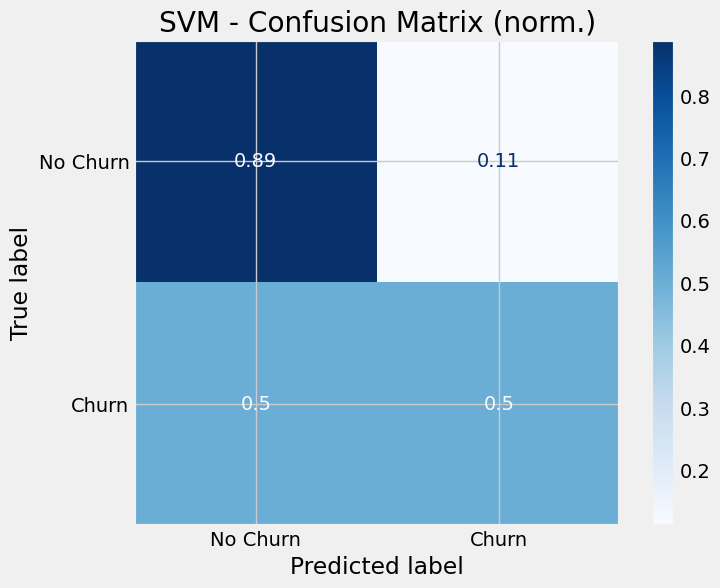

Accuracy Score Test: 0.7860696517412935
Accuracy Score Train: 0.8190222222222222 (as comparison)



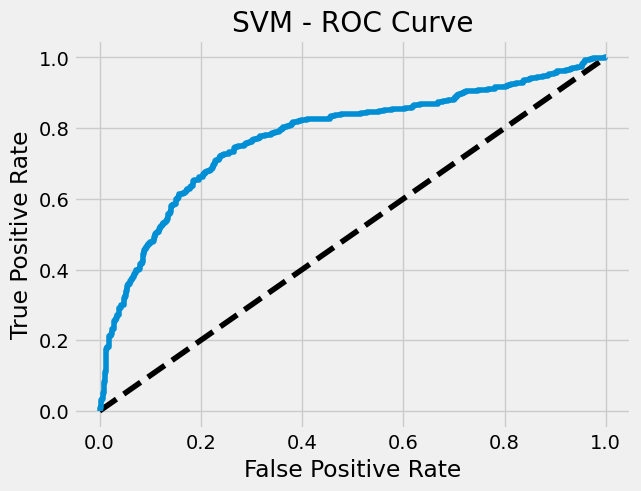

AUC Score (ROC): 0.7763406515470749



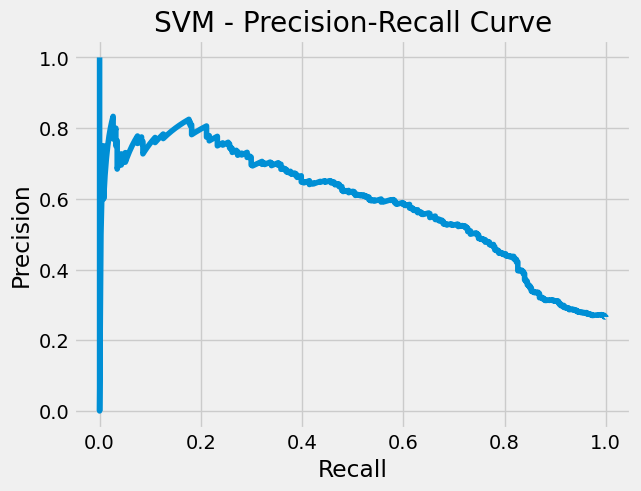

F1 Score: 0.554074074074074 
AUC Score (PR): 0.5889052658889034



In [ ]:
from sklearn.svm import SVC

# Instancia y entrenamiento de un clasificador SVM basado en el conjunto de entrenamiento.
support_vector_m = SVC(kernel='rbf', probability=True)
support_vector_m.fit(X_train,y_train)

# Hacer predicciones (clases y probabilidades) con el clasificador entrenado en el conjunto de prueba.
y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_prob = support_vector_m.predict_proba(X_test)

# Visualizar evaluaciones del modelo.
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m, y_pred_svm, 'SVM')
roc_curve_auc_score(X_test, y_test, y_pred_svm_prob, 'SVM')
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm, y_pred_svm_prob, 'SVM')

##**Paso 8: Ajuste de hiperparámetros/Mejora del modelo**


Para abordar un sesgo potencial derivado de la división específica de los datos en la parte de división de prueba de entrenamiento, se utiliza la validación cruzada durante el ajuste de hiperparámetros con búsqueda en cuadrícula y búsqueda aleatoria.

Las validaciones cruzadas dividen los datos de entrenamiento en una cantidad específica de pliegues (folds). Para cada iteración, un pliegue se mantiene como conjunto de "desarrollo (development)" y los otros pliegues se usan como conjunto de entrenamiento. El resultado de la validación cruzada son k valores
todas las métricas.

![cv](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

**K Vecinos más cercanos (optimizado)**

Para KNN usa GridSearchCV para determinar el número óptimo de vecinos (k) que conducen al mejor rendimiento del modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV

#Define parameter grid for GridSearch and instanciate and train model.
param_grid = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_knn_tuned = knn_cv.predict(X_test)
y_pred_knn_tuned_prob = knn_cv.predict_proba(X_test)

print('KNN best number of neighbors:', knn_cv.best_params_, '\n')

KNN best number of neighbors: {'n_neighbors': 22} 



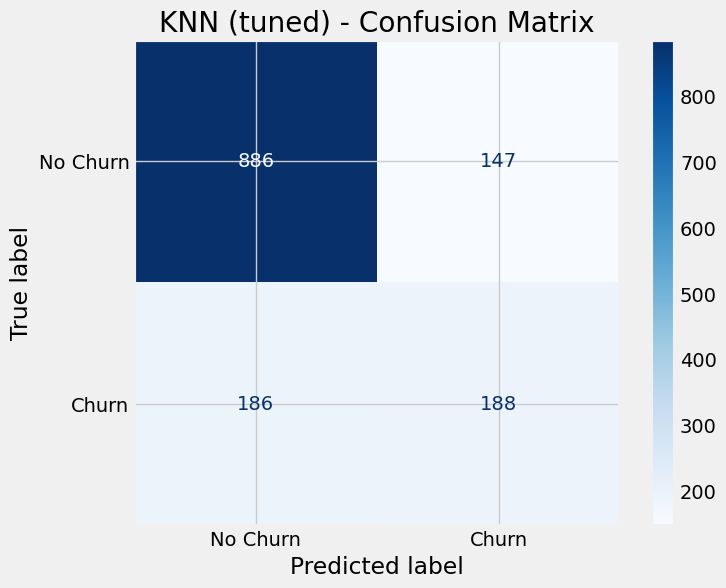

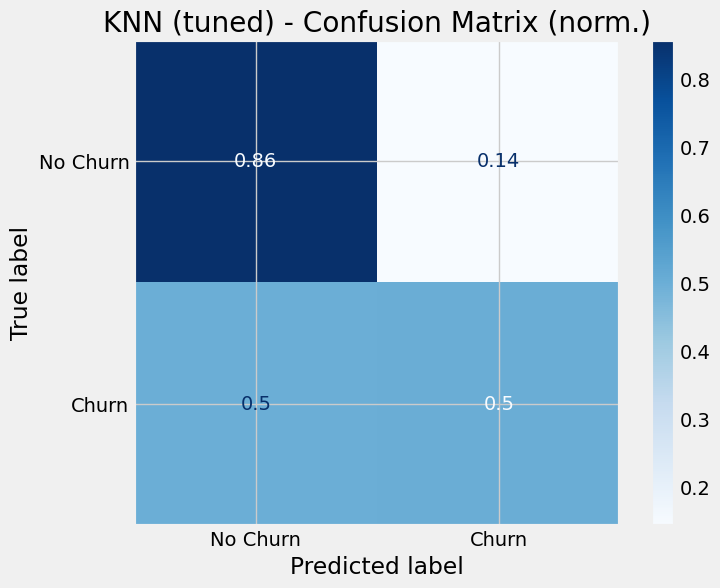

Accuracy Score Test: 0.7633262260127932
Accuracy Score Train: 0.8060444444444445 (as comparison)



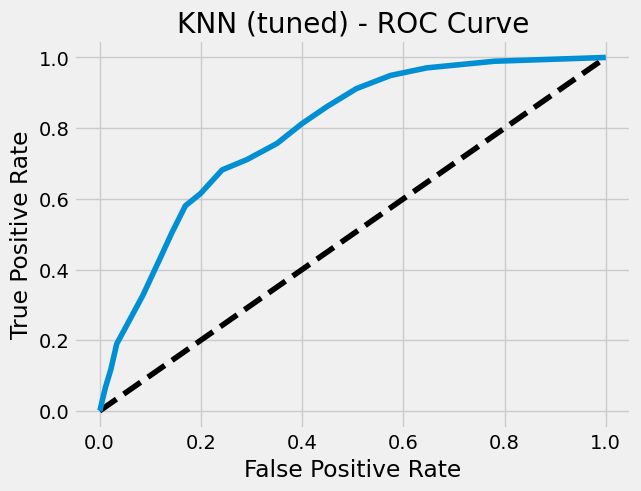

AUC Score (ROC): 0.7908316983398128



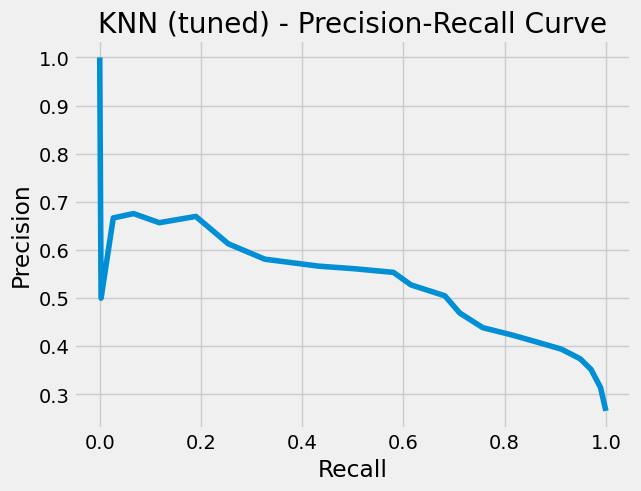

F1 Score: 0.530324400564175 
AUC Score (PR): 0.537159005640281



In [ ]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn_cv, y_pred_knn_tuned, 'KNN (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_knn_tuned_prob, 'KNN (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn_tuned, y_pred_knn_tuned_prob, 'KNN (tuned)')

**Regresión logística (optimizada)**

Para Logistic Regression se usa GridSearchCV  para determinar el mejor modelo mientras se aplican diferentes valores de regularización L1 o L2 para convertir el impacto de la característica no significativa en cero (L1) o para simplificar el modelo al relativizar patrones fuertes que se detectan durante el entrenamiento ( L2).

In [ ]:
#Define parameter grid for GridSearch and instanciate and train model.
param_grid_L1 = {'penalty': ['l1', 'l2'], 'C': np.arange(.1, 5, .1)}
logreg_tuned = LogisticRegression(solver='saga', max_iter=1000)
logreg_tuned_gs = GridSearchCV(logreg_tuned, param_grid_L1, cv=5)
logreg_tuned_gs.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_logreg_tuned = logreg_tuned_gs.predict(X_test)
y_pred_logreg_tuned_prob = logreg_tuned_gs.predict_proba(X_test)

print('Logistic Regression - Best Parameters: ', logreg_tuned_gs.best_params_)


Logistic Regression - Best Parameters:  {'C': 0.9, 'penalty': 'l1'}


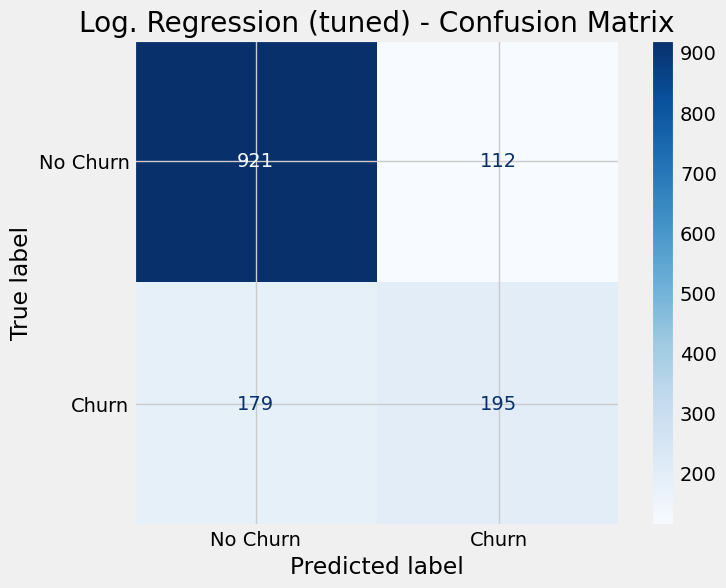

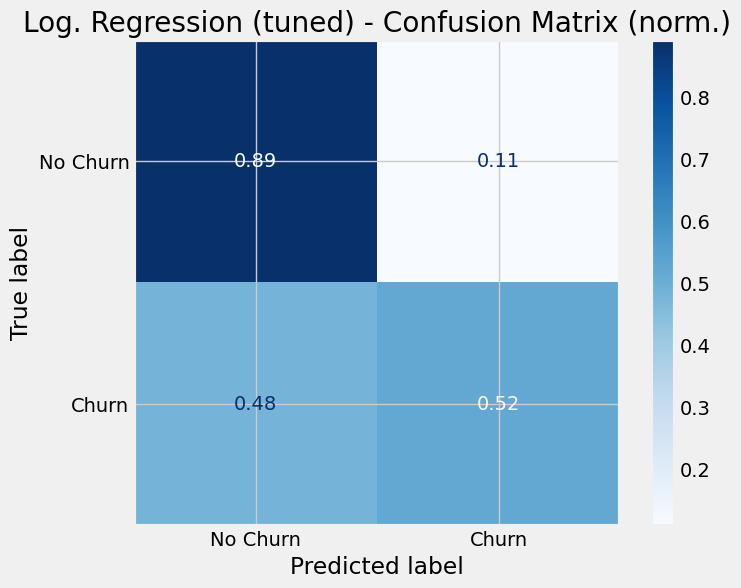

Accuracy Score Test: 0.7931769722814499
Accuracy Score Train: 0.8072888888888888 (as comparison)



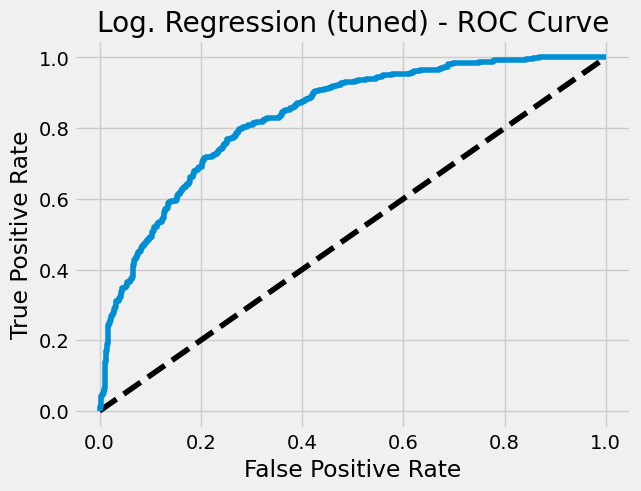

AUC Score (ROC): 0.832353200014495



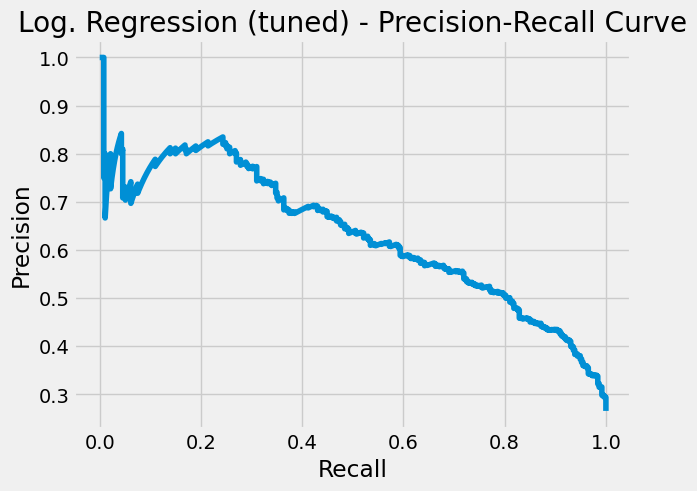

F1 Score: 0.5726872246696034 
AUC Score (PR): 0.6317199512660258



In [ ]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg_tuned_gs, y_pred_logreg_tuned, 'Log. Regression (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_tuned_prob, 'Log. Regression (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg_tuned, y_pred_logreg_tuned_prob, 'Log. Regression (tuned)')

**Random Forest (optimizado)**

Para el modelo Random Forest, se usa RandomizedSearchCV para optimizar varios hiperparámetros, incluidos n_estimators, max_features, max_ depth, criterio y bootstrap.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Define parameter grid for RandomizedSearch and instanciate and train model.
param_grid_rf = {'n_estimators': np.arange(10, 2000, 10),
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': np.arange(10, 200, 10),
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}

rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, cv=5, verbose=0)
rf_random_grid.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf_tuned = rf_random_grid.predict(X_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(X_test)

print('Random Forest - Best Parameters: ', rf_random_grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Random Forest - Best Parameters:  {'n_estimators': 740, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': False}


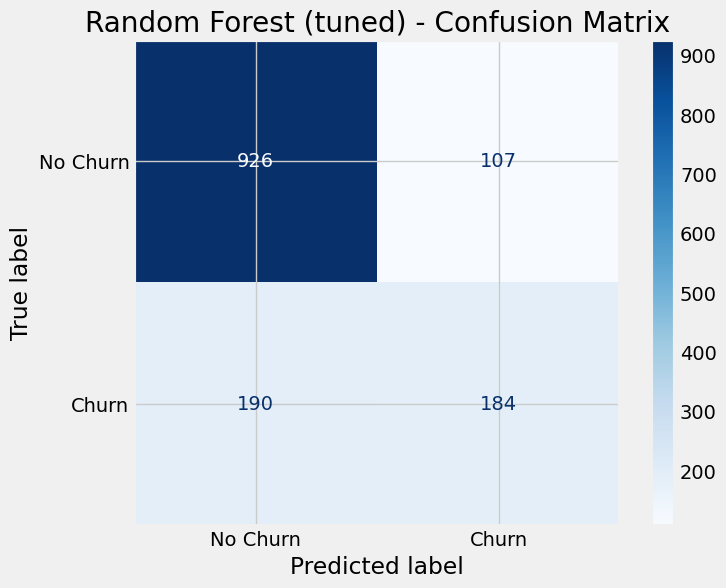

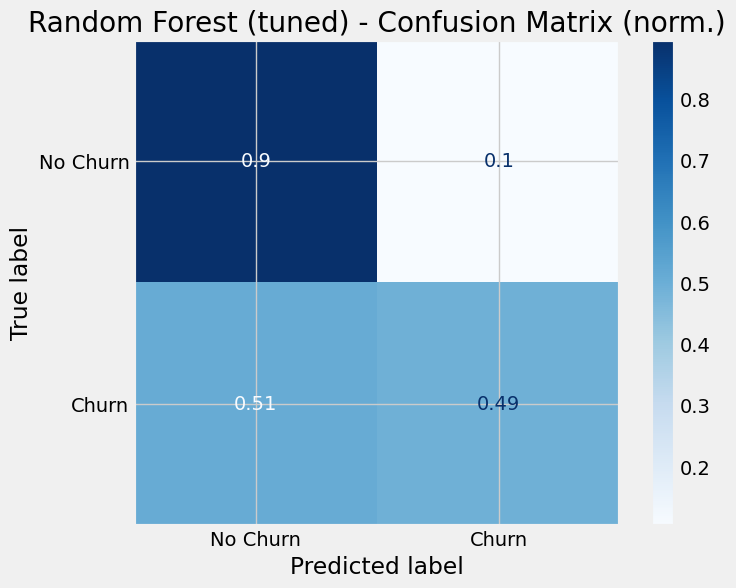

Accuracy Score Test: 0.7889125799573561
Accuracy Score Train: 0.8849777777777778 (as comparison)



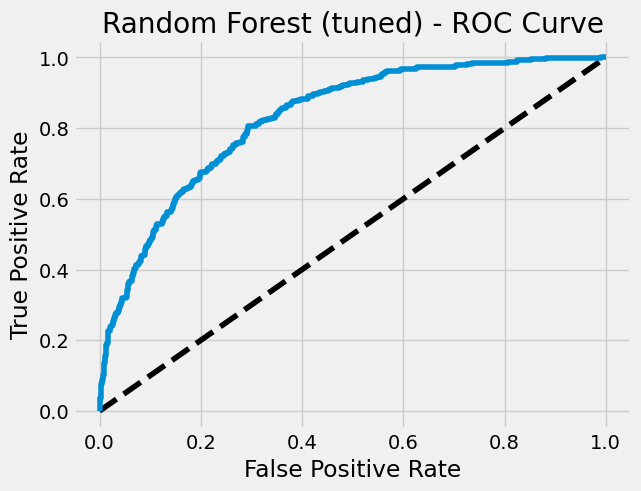

AUC Score (ROC): 0.8272644444559485



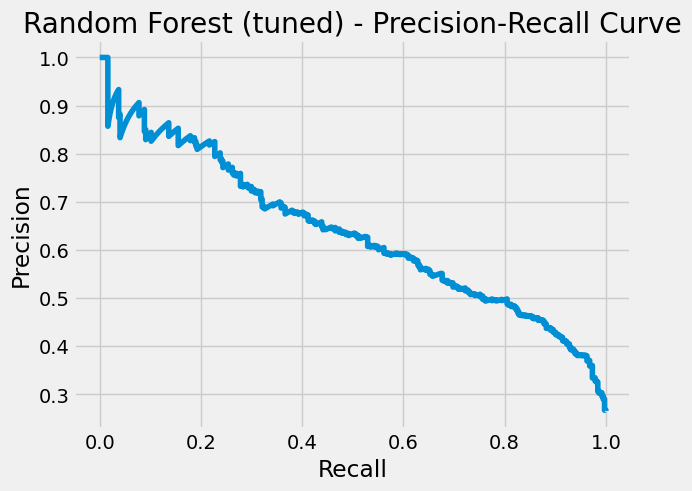

F1 Score: 0.5533834586466165 
AUC Score (PR): 0.635994871585247



In [ ]:

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf_random_grid, y_pred_rf_tuned, 'Random Forest (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_rf_tuned_prob, 'Random Forest (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf_tuned, y_pred_rf_tuned_prob, 'Random Forest (tuned)')


**Máquinas de vectores soporte**

Para SVM, GridSearchCV se usa para determinar el valor C para el margen óptimo alrededor del vector de soporte.

In [ ]:
#Define parameter grid for GridSearch and instanciate and train model.
param_grid_svm = {'C': np.arange(.1, 3, .1)}
support_vector_m = SVC(kernel='linear', probability=True)
support_vector_m_tuned = GridSearchCV(support_vector_m, param_grid_svm, cv=5)
support_vector_m_tuned.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_svm_tuned = support_vector_m_tuned.predict(X_test)
y_pred_svm_tuned_prob = support_vector_m_tuned.predict_proba(X_test)

print('SVM best C value', support_vector_m_tuned.best_params_, '\n')

SVM best C value {'C': 0.30000000000000004} 



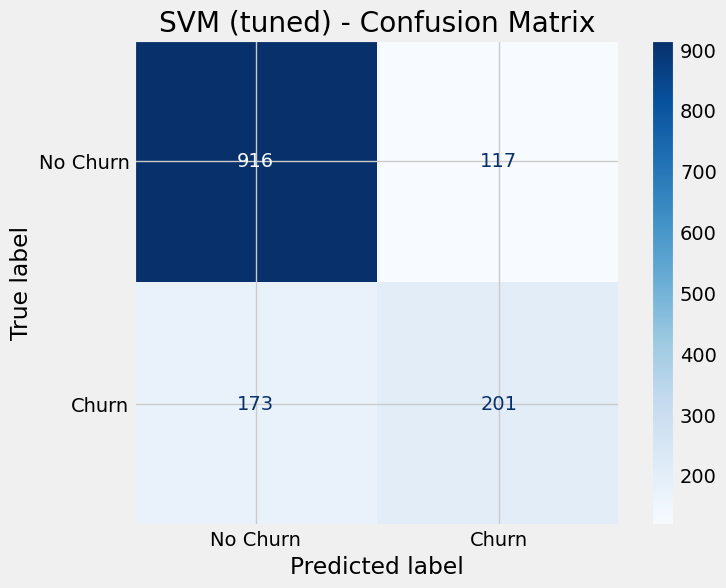

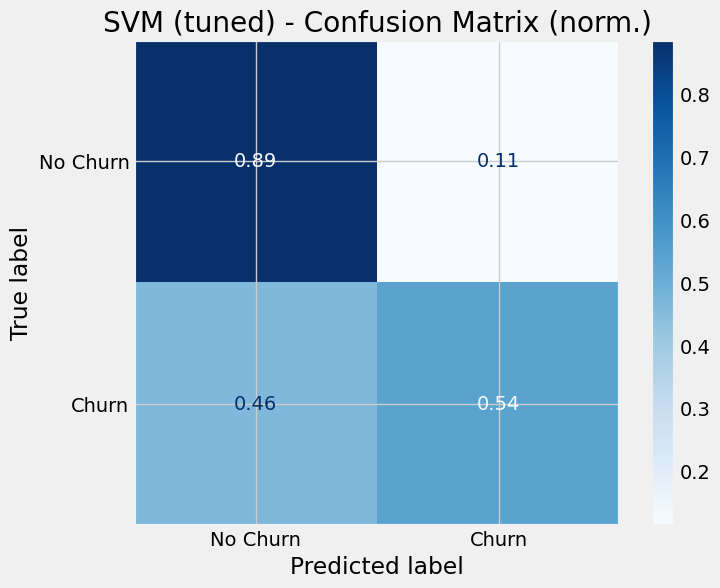

Accuracy Score Test: 0.7938877043354655
Accuracy Score Train: 0.8026666666666666 (as comparison)



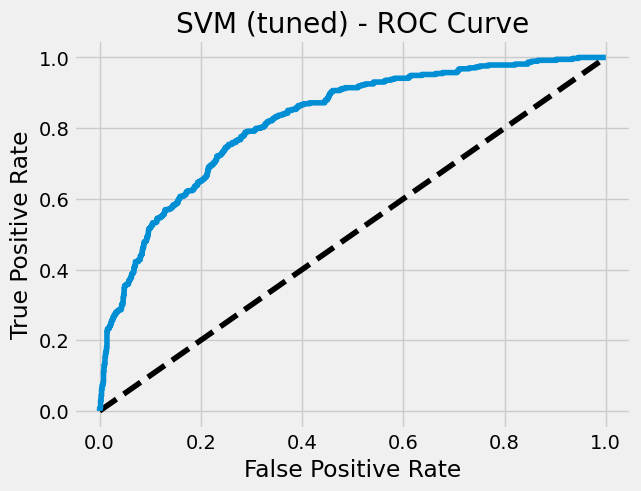

AUC Score (ROC): 0.8200532170978045



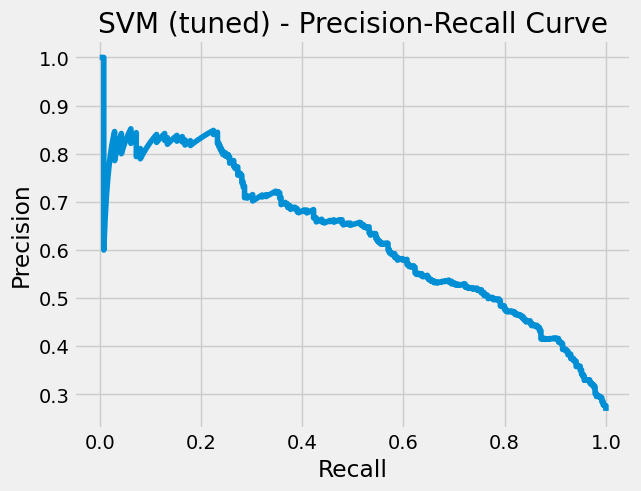

F1 Score: 0.5809248554913296 
AUC Score (PR): 0.6282428527395723



In [ ]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m_tuned, y_pred_svm_tuned, 'SVM (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_svm_tuned_prob, 'SVM (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm_tuned, y_pred_svm_tuned_prob, 'SVM (tuned)')


**Red neuronal**

Aunque el conjunto de datos es relativamente pequeño y las redes neuronales generalmente requieren muchos datos de entrenamiento para desarrollar capacidades de predicción significativas, se emplea una red neuronal simple para una comparación rápida con los otros enfoques.


In [ ]:
from keras.models import Sequential, load_model
from keras import layers
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint

In [ ]:
# Instancia la Red Neuronal, Construye su estructura de capas y compilación del modelo
nn = Sequential()
Input_Shape = X_train.shape[1]

nn.add(layers.Dense(1024, input_shape=(Input_Shape,), activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1024, activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.summary()

# Se guarda el modelo con el mejor valor de accuracy en validación durante el entrenamiento.
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# Se entrena el modelo y se guarda la mejor versión
fit_nn = nn.fit(X_train, y_train,
          epochs=100,
          verbose=False,
          validation_data=(X_test, y_test),
          batch_size=30, callbacks=[mc])

best_nn = load_model('best_model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              49152     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1099777 (4.20 MB)
Trainable params: 1099777 (4.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Visualiza la evaluación del mejor modelo y modelo final, después de haber completado el entrenamiento.
accuracy = best_nn.evaluate(X_train, y_train, verbose=False)
print("Best Model Training Score: {:.4f}".format(accuracy[0]))
print("Best Model Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = best_nn.evaluate(X_test, y_test, verbose=False)
print("Best Model Testing Score: {:.4f}".format(accuracy[0]))
print("Best Model Testing Accuracy: {:.4f}".format(accuracy[1]))
print("-----------------------------------------")

accuracy = nn.evaluate(X_train, y_train, verbose=False)
print("Final Model Training Score: {:.4f}".format(accuracy[0]))
print("Final Model Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = nn.evaluate(X_test, y_test, verbose=False)
print("Final Model Testing Score: {:.4f}".format(accuracy[0]))
print("Final Model Testing Accuracy: {:.4f}".format(accuracy[1]))

Best Model Training Score: 0.3925
Best Model Training Accuracy: 0.8158
Best Model Testing Score: 0.4478
Best Model Testing Accuracy: 0.7953
-----------------------------------------
Final Model Training Score: 0.0922
Final Model Training Accuracy: 0.9545
Final Model Testing Score: 1.8122
Final Model Testing Accuracy: 0.7441


In [ ]:
# Define una función para mostrar el histórico de loss y accuracy durante entrenamiento.
def plot_history(fit_keras):
    acc = fit_keras.history['accuracy']
    val_acc = fit_keras.history['val_accuracy']
    loss = fit_keras.history['loss']
    val_loss = fit_keras.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Acc.')
    plt.plot(x, val_acc, 'r', label='Testing Acc.')
    plt.title('Training & Testing Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    plt.plot(x, val_loss, 'r', label='Testing Loss')
    plt.title('Training & Testing Loss')
    plt.legend()

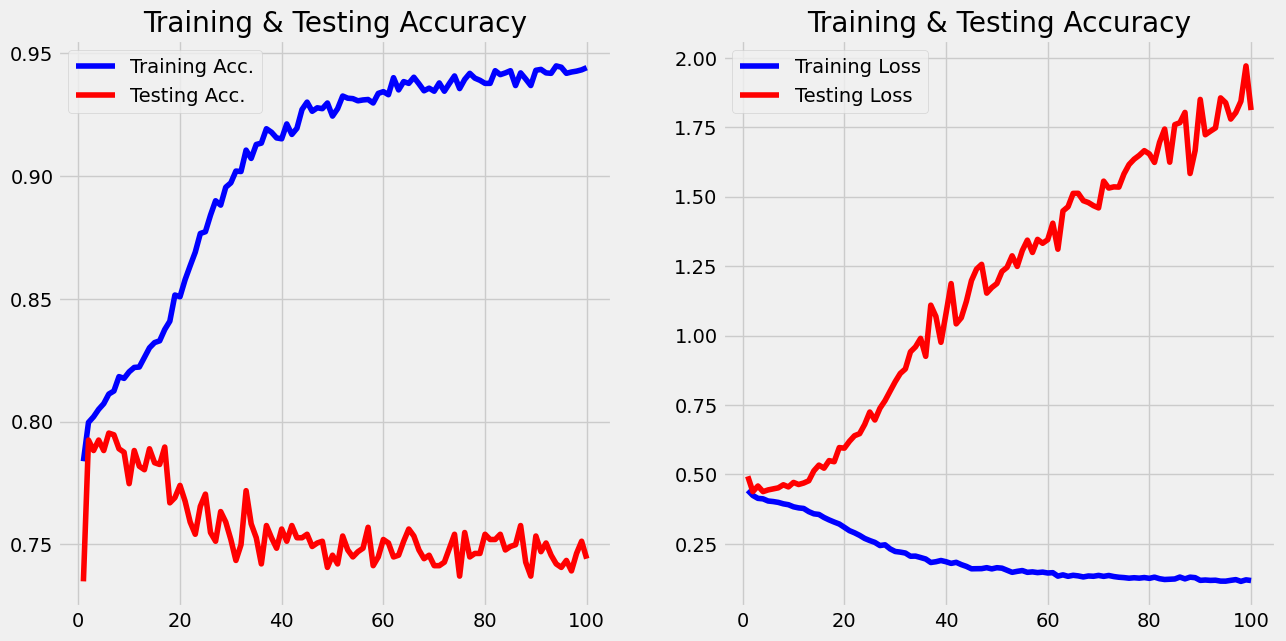

In [ ]:
plot_history(fit_nn)